# **Hyperparameter tuning**

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

from utils import plots
from utils import constants

## **Constants**

In [42]:
TUNING_FOLDER = constants.TUNING_FOLDER
LVL1_RESULTS = os.path.join(TUNING_FOLDER, 'lvl1.csv')

### **Level 1**

In [43]:
lvl1_df = pd.read_csv(LVL1_RESULTS)
lvl1_df.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
315,2023-07-26 14:07:36.626009,es_gn_scored_june_transformer.npz,valid_es.txt.es,valid_gn.txt.gn,sacrebleu_corpus_bleu,2.614965,8,"{'devices': ['0', '1'], 'early-stopping': ['7'..."
316,2023-07-26 14:08:53.427986,es_gn_scored_june_transformer.npz,valid_es.txt.es,valid_gn.txt.gn,sacrebleu_corpus_chrf,18.309891,9,"{'devices': ['0', '1'], 'early-stopping': ['7'..."
317,2023-07-26 14:08:53.427986,es_gn_scored_june_transformer.npz,valid_es.txt.es,valid_gn.txt.gn,sacrebleu_corpus_bleu,2.817177,9,"{'devices': ['0', '1'], 'early-stopping': ['7'..."
318,2023-07-26 14:10:18.711054,es_gn_scored_june_transformer.npz,valid_es.txt.es,valid_gn.txt.gn,sacrebleu_corpus_chrf,18.513704,10,"{'devices': ['0', '1'], 'early-stopping': ['7'..."
319,2023-07-26 14:10:18.711054,es_gn_scored_june_transformer.npz,valid_es.txt.es,valid_gn.txt.gn,sacrebleu_corpus_bleu,2.899490,10,"{'devices': ['0', '1'], 'early-stopping': ['7'..."


**Visual analysis**

In [44]:
gn_es_results = lvl1_df[lvl1_df['source'].str.contains('gn', regex=False)]
es_gn_results = lvl1_df[lvl1_df['source'].str.contains('es', regex=False)]

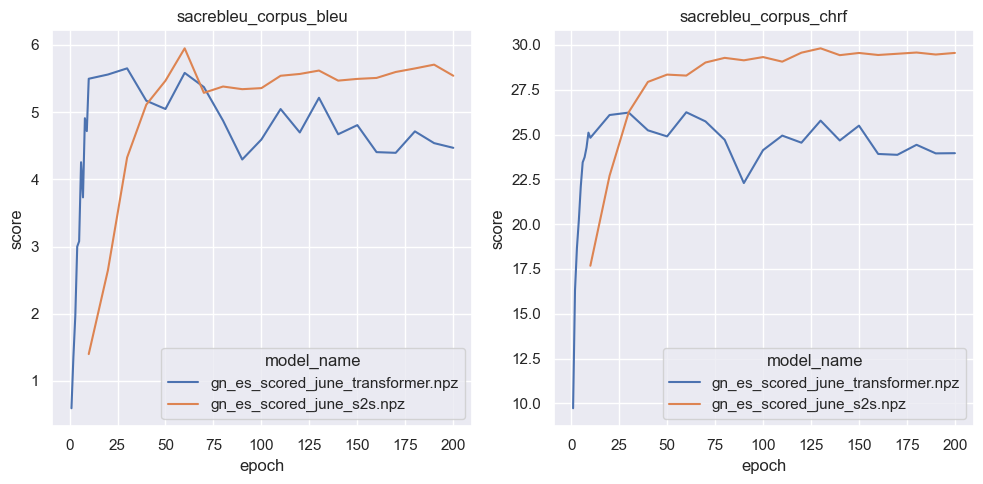

In [45]:
plots.plot_metric_by_epoch_foreach_model(gn_es_results, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(10,5));

In [46]:
gn_es_results.columns

Index(['date', 'model_name', 'source', 'target', 'score_type', 'score',
       'epoch', 'parameters'],
      dtype='object')

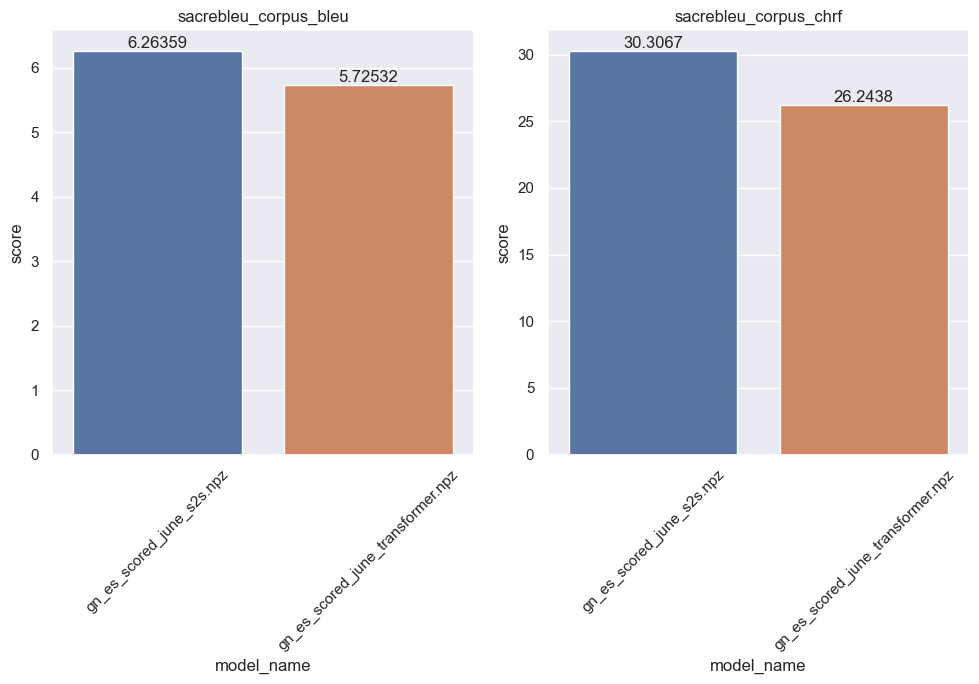

In [47]:
plots.plot_max_score_by_model(gn_es_results, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(10,7));

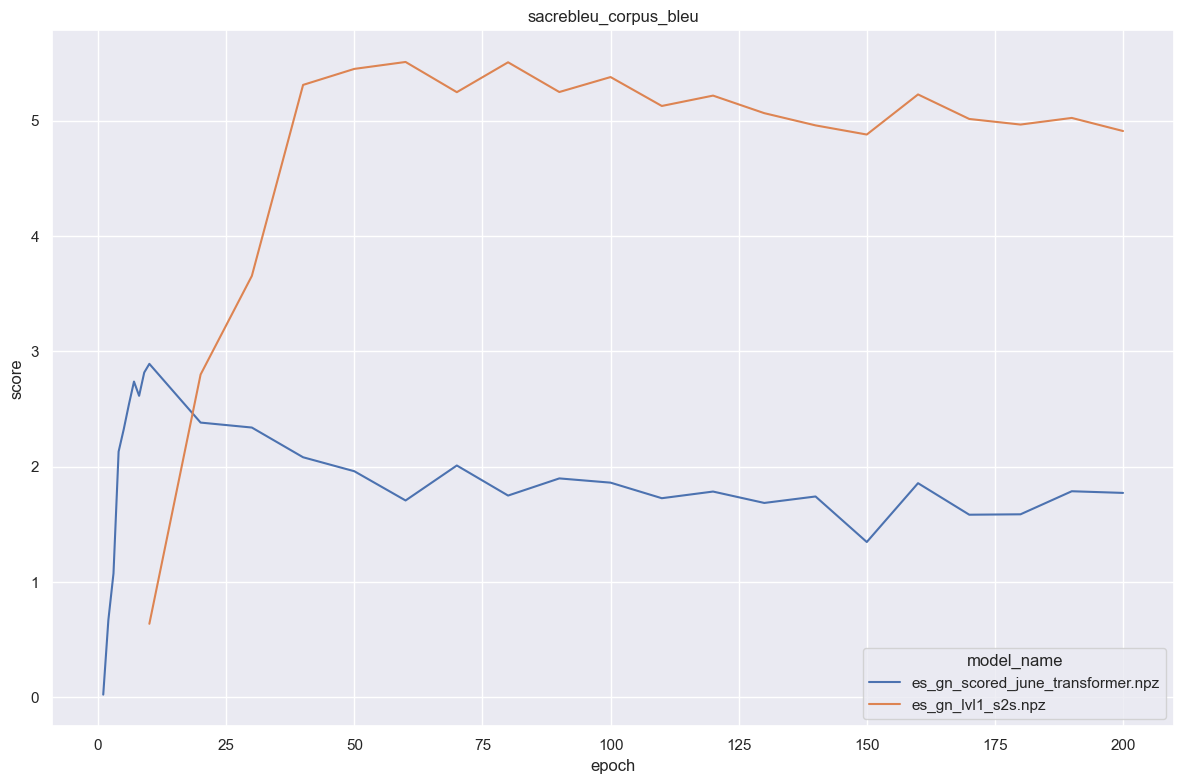

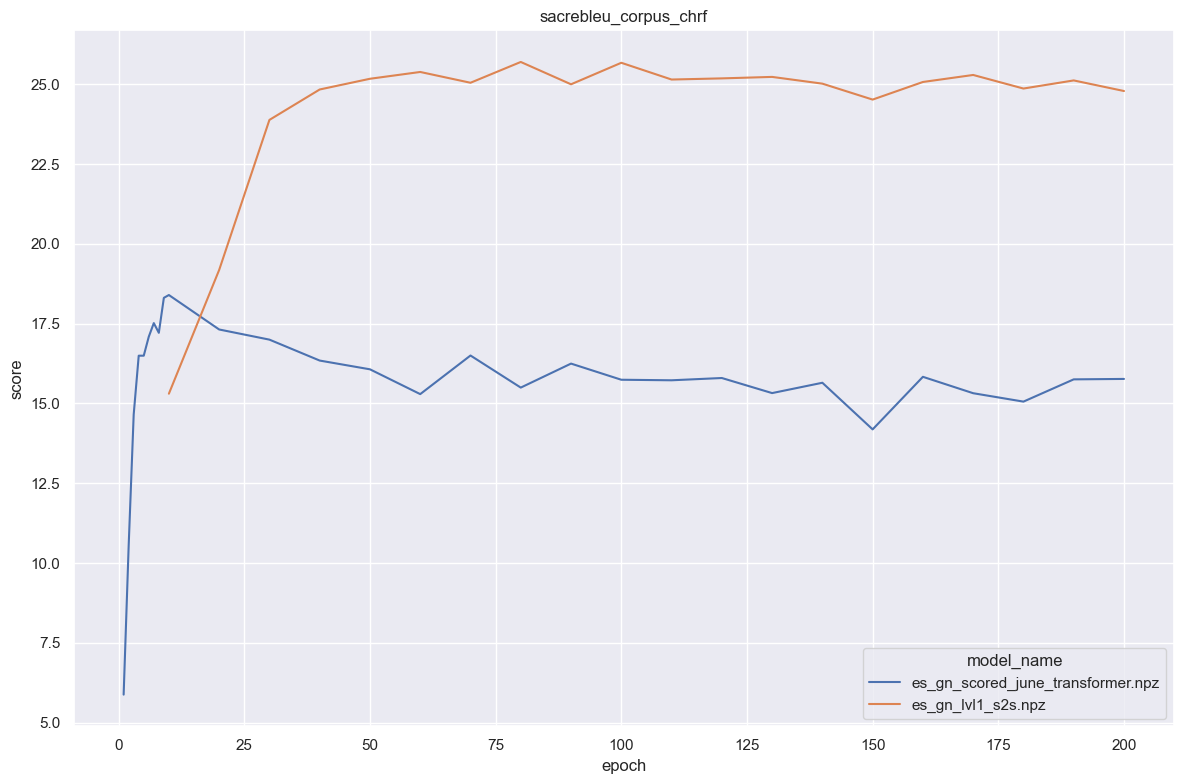

In [48]:
plots.plot_metric_by_epoch_foreach_model(es_gn_results, metric='sacrebleu_corpus_bleu');
plots.plot_metric_by_epoch_foreach_model(es_gn_results, metric='sacrebleu_corpus_chrf');

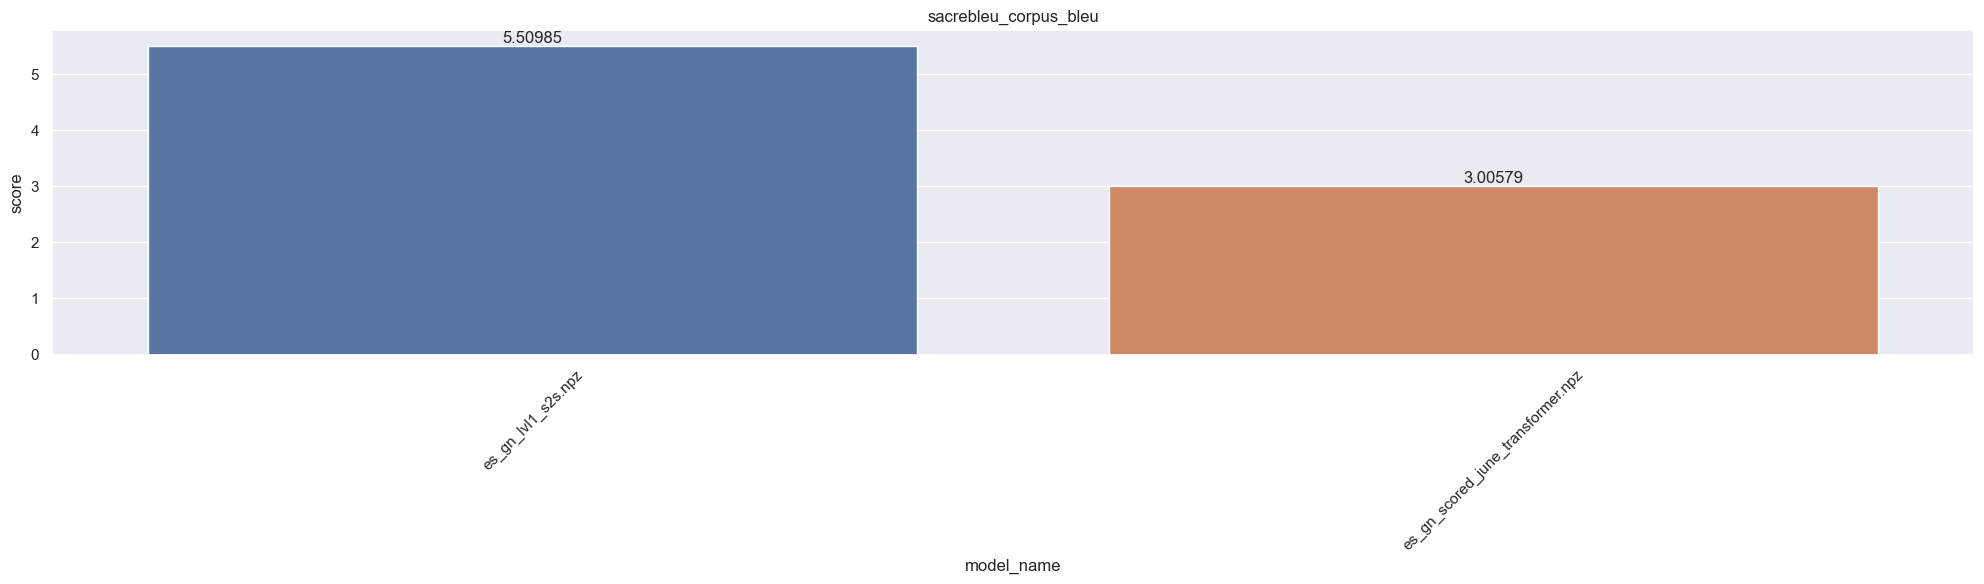

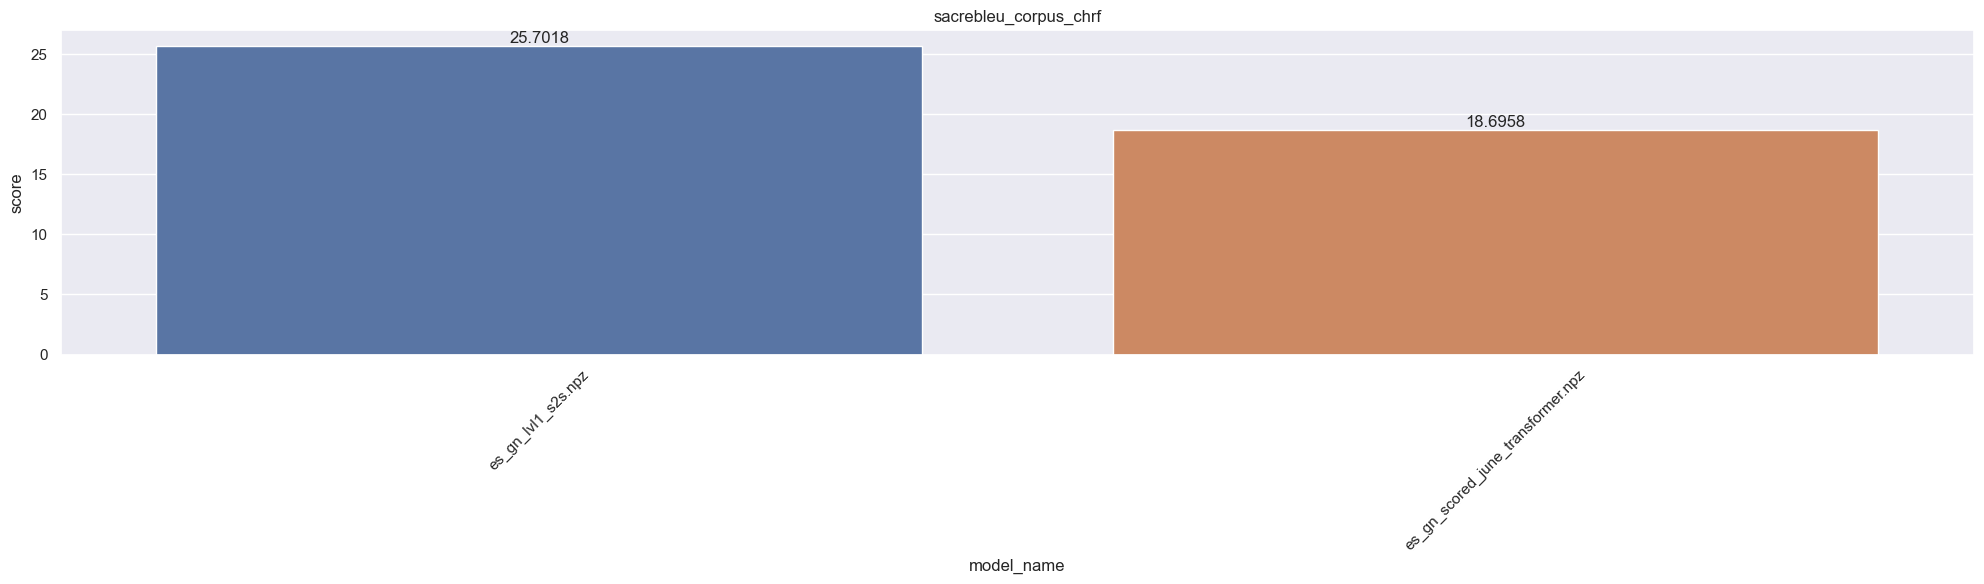

In [49]:
plots.plot_max_score_by_model(es_gn_results, metric='sacrebleu_corpus_bleu');
plots.plot_max_score_by_model(es_gn_results, metric='sacrebleu_corpus_chrf');

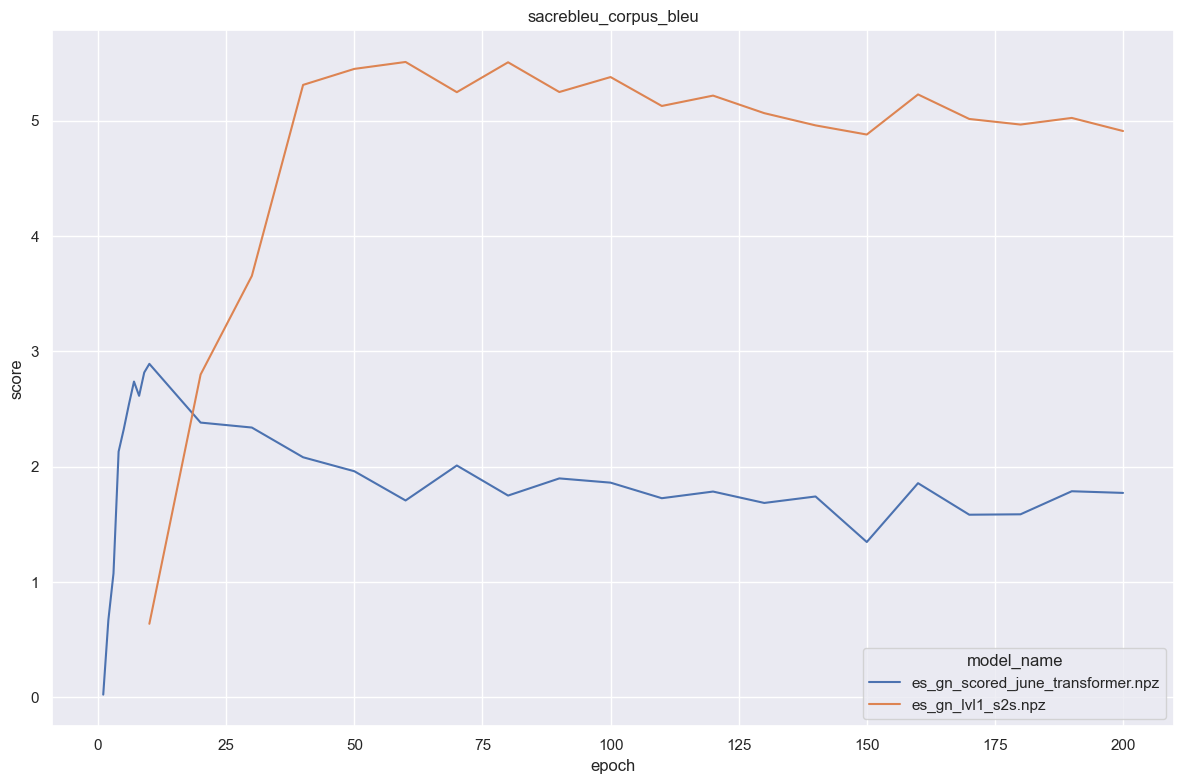

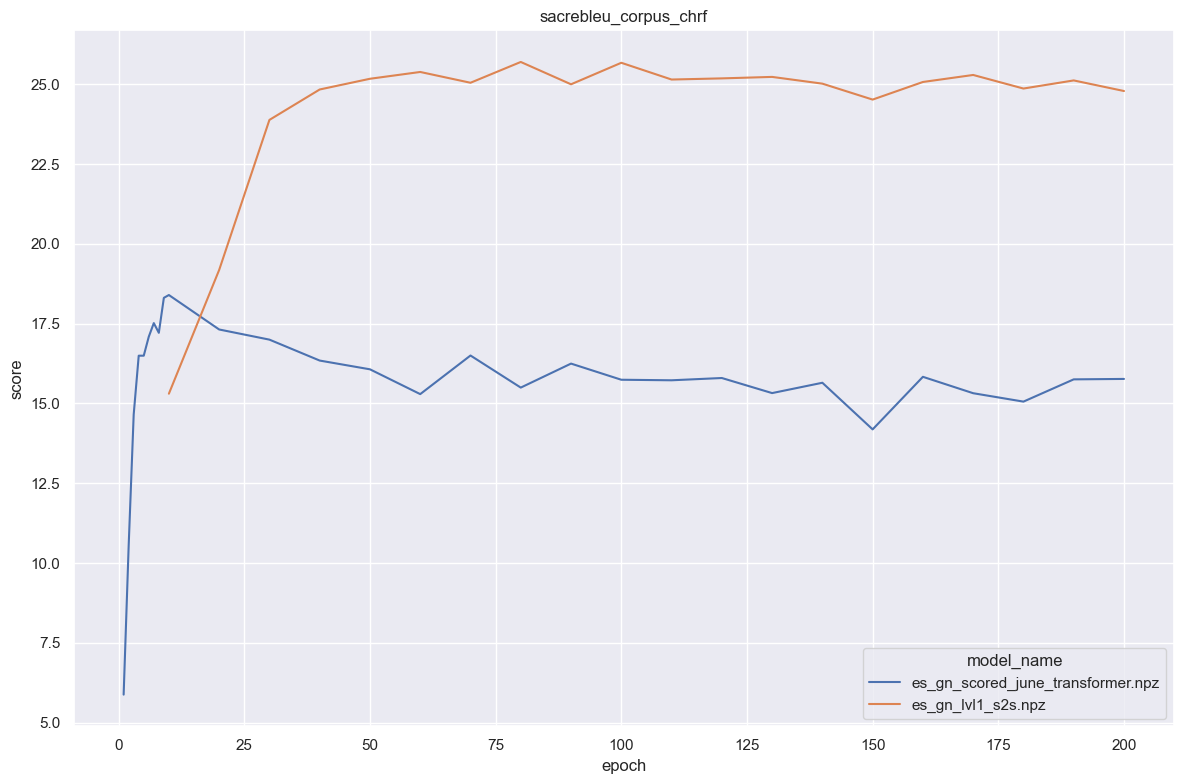

In [50]:
plots.plot_metric_by_epoch_foreach_model(es_gn_results, metric='sacrebleu_corpus_bleu');
plots.plot_metric_by_epoch_foreach_model(es_gn_results, metric='sacrebleu_corpus_chrf');